Mean Squared Error: 3974541.3516684645


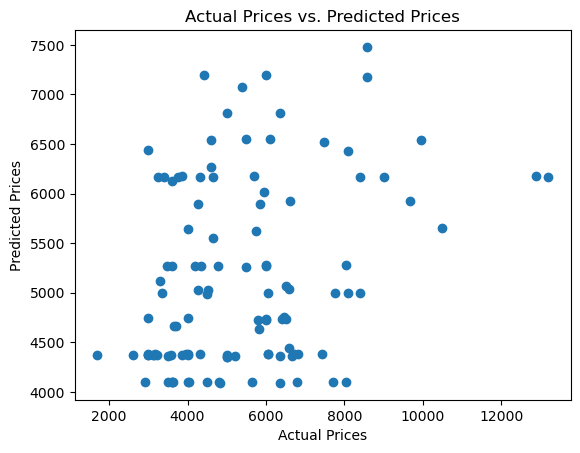

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_csv('Housing project.csv')

X = data[['bedrooms', 'bathrooms', 'stories', 'parking']]
y = data['price']
phone_numbers = data['phone_number']  

X_train, X_test, y_train, y_test, phone_train, phone_test = train_test_split(X, y, phone_numbers, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

In [6]:
# Now, you can use the trained model to predict house prices for new data
bedrooms = int(input("Enter the number of bedrooms: "))
bathrooms = int(input("Enter the number of bathrooms: "))
stories = int(input("Enter the number of stories: "))
parking = int(input("Enter the number of parking spaces: "))

new_price = pd.DataFrame({
    'bedrooms': [bedrooms],
    'bathrooms': [bathrooms],
    'stories': [stories],
    'parking': [parking],
})

predicted_price = model.predict(new_price)
print(f'Predicted Price: {predicted_price[0]}')

# Find phone numbers associated with data points in the range of the predicted price
lower_bound = predicted_price[0] - 500  # Adjust the range as needed
upper_bound = predicted_price[0] + 500

# Filter data within the range
filtered_data = data[(y >= lower_bound) & (y <= upper_bound)]



# Print phone numbers associated with the filtered data
if not filtered_data.empty:
    print("Phone Numbers you can contact:")
    for phone_number in filtered_data['phone_number']:
        print(phone_number)
else:
    print("No data points in the specified price range.")

Enter the number of bedrooms: 3
Enter the number of bathrooms: 2
Enter the number of stories: 2
Enter the number of parking spaces: 6
Predicted Price: 10125.015394737738
Phone Numbers you can contact:
8757262866
6810162226
9756856734
7678967555
8689656461
5656768455
4623532627
3465674664
6876967864
1454656785
